Unit 12, Lecture 2
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 7 2016

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("talk")
seaborn.set_style("whitegrid")
import scipy.stats

Estimating Statistical Uncertainty
===

Assume for a moment that $X$ is a random variable with $P(x)$. Next, we have $y = f(x)$ and we want to know what $P(y)$ is.
For example, let's say $x$ is mass measured on a balance, $y$ is the number of moles, and $f(x) = x / \mathrm{MW}$, $\mathrm{MW}=18$. If we have 5 measurements of $x$ that are [3.5g, 3.4g, 3.3g, 3.6g, 3.2g], What is the confidence interval for $y$?

Error Propogation
---

The new method we're learning this time is to propogate standard deviation or confidence interval widths using derivatives. We use the following approximation:

$$\frac{\Delta y}{\Delta x} \approx \left.\frac{dy}{dx}\right|_{x=\hat{x}}$$

which is valid when $\Delta x$ is small relative to $\frac{dy}{dx}$.



This approximation can be rewritten as:

$$\Delta y \approx \left.\frac{dy}{dx}\right|_{x=\hat{x}}\Delta x$$

so a distance in $x$ can be turned into a distance in $y$ using the derivative. To solve our example, we'll get a confidence interval in $x$ and turn it into a confidence interval in $y$. Notice that we evaluate the derivative at the sample-mean (the most likely point).

In [3]:
data = np.array([3.5, 3.4, 3.3, 3.6, 3.2])
sigma_x = sqrt(np.var(data, ddof=1))
mean = np.mean(data)

T_hi = scipy.stats.t.ppf(0.975, len(data))
ci_width = T_hi * sigma_x / sqrt(len(data))

print(ci_width)
print(mean)

0.181767584827
3.4


So the mean in $x$ is $3.4 \pm 0.18$. Then we find the expected $y$ using the $f(x)$ equation:

$$\hat{y} = \frac{\hat{x}}{18}$$

and get the confidence interval width using our new distance conversion formula

$$w_y = \frac{1}{18} w_x$$

In [6]:
print mean / 18.
print ci_width / 18.

0.188888888889
0.010098199157


So we get the same answer as method 2, which is $0.19 \pm 0.01$

Fraction Uncertainty Example
===

We measure the volume of a sample with known mass. We obtain the following volumes: [1.2 ml, 0.9 ml, 1.3 ml, 1.0 ml, 1.3 ml]. The mass is 1g. What is the density and what is the uncertainty?

$$\rho = \frac{1.0}{v}$$

$$\Delta \rho = \left.\frac{d\rho}{dv}\right|_{v = \hat{v}} \Delta v = -\frac{1.0}{\hat{v}^2} \Delta v$$

In [5]:
data = np.array([1.2, 0.9, 1.3, 1.0, 1.3])
sigma_x = sqrt(np.var(data, ddof=1))
mean = np.mean(data)

T_hi = scipy.stats.t.ppf(0.975, len(data))
v_width = T_hi * sigma_x / sqrt(len(data))

print(v_width)
print(mean)

0.208835055629
1.14


In [7]:
rho_width = -1.0 / mean**2 * v_width

print(1.0 / mean, rho_width)

0.877192982456 -0.160691794113


Notice that the negative sign has no influence on the confidence inerval. The answer is $\rho = 0.88 \pm 0.16$

Error Propogation in Multiple Dimensions
===

The general formula for $N$-dimensions is:

$$\Delta f(x_1, \ldots, x_N) = \sqrt{\sum_i^N \left(\left.\frac{\partial f(x_1, \ldots, x_N)}{\partial x_i}\right|_{f(\hat{x})}\right)^2 \left(\Delta x_i\right)^2}$$

So, for examlpe, in 2D it would be:

$$\Delta f(x,y) = \sqrt{\left(\left.\frac{\partial f(x,y)}{\partial x}\right|_{f(\hat{x}, \hat{y})}\right)^2 \left(\Delta x\right)^2 + \left(\left.\frac{\partial f(x,y)}{\partial y}\right|_{f(\hat{x}, \hat{y})}\right)^2 \left(\Delta y\right)^2 }$$

Example
----

The formula for density is:

$$\rho = \frac{m}{v}$$

and I have the following measurements:

* $m = $ [3.5g, 3.4g, 3.3g, 3.6g, 3.2g]
* $v = $ [1.2 ml, 0.9 ml, 1.3 ml, 1.0 ml, 1.3 ml]


What is then 95% Confidence Interval for density?

The partial derviatves are:

$$\frac{\partial \rho}{\partial m} = \frac{1}{v}$$

$$\frac{\partial \rho}{\partial v} = -\frac{m}{v^2}$$

In [8]:
masses = np.array([3.5, 3.4, 3.3, 3.6, 3.2])
volumes = np.array([1.2, 0.9, 1.3, 1.0, 1.3])

m_ci_width = scipy.stats.t.ppf(0.975, len(masses)) * np.sqrt(np.var(masses, ddof=1) / len(masses))

v_ci_width = scipy.stats.t.ppf(0.975, len(volumes)) * np.sqrt(np.var(volumes, ddof=1) / len(volumes))

print(m_ci_width, v_ci_width)

0.181767584827 0.208835055629


Now, we check if the errors are small relative to the partial derivatives

In [9]:
m = np.mean(masses)
v = np.mean(volumes)

dm = (1.0 / v)
dv = (m / v**2)

print(dm, m_ci_width)
print(dv, v_ci_width)


0.877192982456 0.181767584827
2.6161895968 0.208835055629


Looks good enough!

In [10]:
drho = sqrt( dm**2 * m_ci_width**2 + dv**2 * v_ci_width**2)

print(m / v, drho)

2.98245614035 0.5691426928775963


So the density is $$2.98 \pm 0.57 \; \textrm{g / ml}$$

Statistical Intuition
===

Sampling Bias
====

Sampling bias is when your samples are NOT independnet from one another, possibly due to some hidden variable.

* Mailed surveys (only weirdos will fill out and return a mailed in survey, giving a biased sample)
* Telephone voting surveys (Older people will sit by their home phone and answer the survey. Young people only have cellphones and don't have time to answer surverys)
* Repeated measurements (If you read the value off a balance 100 times, those aren't independent)

Experimantal Randomization
====

A common sampling bias is the accidental conflation of experimental variables. For example, let's say you're studying a protein assay and want to know if it depends on temperature. So you prepare your experiments like this:

<table>
    <tr> 
        <td> Day </td> <td> Replicate Number</td> <td> Temperature</td>
    </tr>
    <tr> 
        <td> Monday </td> <td> 0</td> <td> 25$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Monday </td> <td> 1</td> <td> 25$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Monday </td> <td> 2</td> <td> 25$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Monday </td> <td> 3</td> <td> 25$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Tuesday </td> <td> 0</td> <td> 30$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Tuesday </td> <td> 1</td> <td> 30$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Tuesday </td> <td> 2</td> <td> 30$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Tuesday </td> <td> 3</td> <td> 30$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Wednesday </td> <td> 0</td> <td> 35$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Wednesday </td> <td> 1</td> <td> 35$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Wednesday </td> <td> 2</td> <td> 35$^\circ{}$C</td>
    </tr>
        <tr> 
        <td> Wednesday </td> <td> 3</td> <td> 35$^\circ{}$C</td>
    </tr>
</table>

There are two problems here. The first is that you test one temperature per day. So, if on Tuesday you're tired and make mistakes, that will look like a temperature effect. Second, you increase in time and increase in temperature. So, if you get better over time at your experiment, that might appear to be a temperature effect.

What do?
----

Write down all your experiments and give them numbers. Then use `numpy.random.choice` to get a random ordering of the experiments. All the problems above will disappear

Correlation vs. Causation
====

Over the last 10 years, the cost of UR tuition has gone up every year. Over the last 10 years, rate of murders in the United States has decreased. Bam! Correlation. Probably not a causation. 

---

Cigarette smoking decreases your risk of dementia. Why?

What is Correlation for if it doesn't imply causation?
---

It can be used to disprove causaution. If your hypothesis is that listening to Ke\$ha improves your critical thinking skills, seeing no improvement after listening to Ke\$ha disproves your hypothesis. 

Hypothesis Testing
==

You are given some numbers from a sequence:

1 2 3 5 8

You may ask if two numbers are in the sequence to test your hypothesis about the sequence and then you state your hypothesis. Think about it before reading on.

---

When faced with this question, most people try to prove their hypothesis. They might ask if 13 is in the sequence or if 21. Those don't discriminate between hypotheses. It turns out, the sequence is just increasing numbers. You could discover this by asking if 12 is in the sequence and I would say yes. You test your hypothesis, you don't prove it.

Error Bars
===

All plots that come from an experiment and not an equation should have error bars. No excuses. Why? Consider this plot:

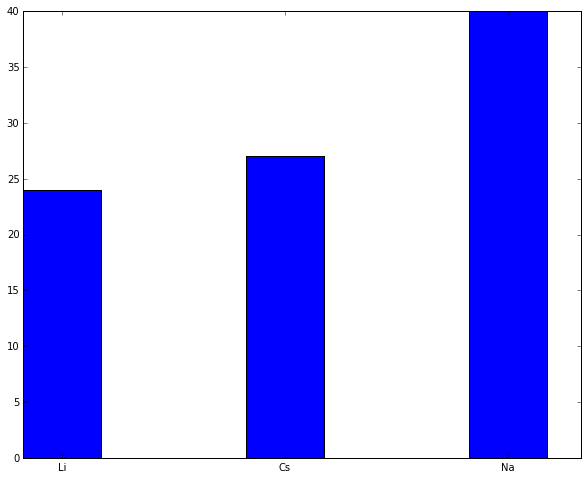

In [6]:
plt.figure(figsize=(10, 8))

ind = np.arange(3)
width = 0.35

plt.bar([0,1, 2], [24, 27, 40], width=width)
plt.gca().set_xticks(ind + width / 2)
plt.gca().set_xticklabels( ('Li', 'Cs', 'Na'))
plt.show()

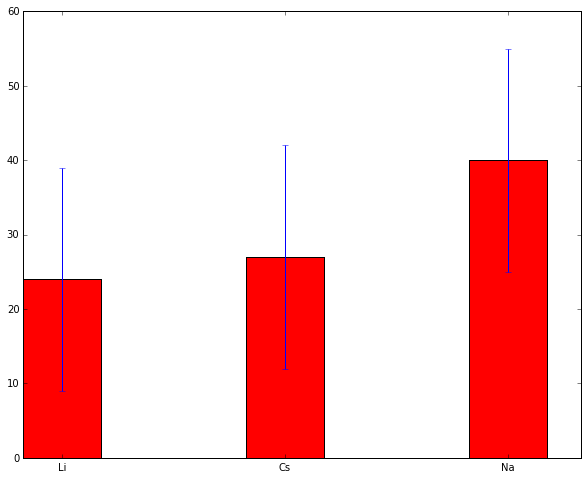

In [8]:
plt.figure(figsize=(10, 8))


plt.bar([0,1, 2], [24, 27, 40], width=width, yerr=15, color='r')
plt.gca().set_xticks(ind + width / 2)
plt.gca().set_xticklabels( ('Li', 'Cs', 'Na'))
plt.show()

However, there still could be a significant difference between the ions. If the error bars are standard deviations, then the standard error could be very small because we did 10000 experiments. That's why it's important to see the error bars and know what they are.

Matched Data vs Unmatched Data
====

Matched data is a billion times better than unmatched. For example, having a person try an acne treatment on the left-side of their face and on the right-side is a much better experiment than having two people try two different treatments. Matched data means you have two "treatments" with the same individual. Another example is the state of Colorado legalizing marijuana. We can look at crime before and after the decriminilization to get very good results. Comparing the crime in Colorado vs Texas would introduce many other factors. If you read Freakonomics, you'll notice the best results come from matched data. 

Whenever you design an experiment, you should try to use matched data. Matched data is not always possible. For example, you can't test a drug with a disease using matched data The person would be partially cured with the drug and it would be unethical to give them the disease a second time. In general though, matced data is much better than unmatched data.

Indepndence vs. Normal vs. Identically Distributed
===

These are all separate things. Much of the work we've done in class rely on this. If samples are independent, that means practically that they count equally in any algorithms we do. If they are normal, we can apply much of the error propogation and hypothesis testing techniques we know. If they are identically distributed, that means they are from the same distribution. That is not often discussed in the class, but if you somehow mix two datasets on accident, they have different population distributions. All these properties together are called IID (ind, identical) and normal IID. 

Example problem:

Sally wants to apply linear regression and checked that her noise is normally distributed. Is that all she needs to
do? No, she should also be sure her samples are independent. 

You conduct a telephone surevy for which presidential candidate people will vote for. To check to make sure your samples are independent, you use the Shapiro-Wilk test. Is that valid?